## Disney Princess or Avenger? Expanded
## Sade Korbieh
## IDSN 544, Fall 2024
## korbieh@usc.edu

Today we are going to expand on my original model. In the first iteration it only differentiated between whether it was a group of Disney Princesses or A group of Avengers. Now it will be able to also look at identifying specific disney princesses as well as marvel avengers. 

In [1]:
## Looking for my princess and superheros

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [90]:
## installing duckduckgo and gradio
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 67.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 50.2 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.18
    Uninstalling urllib3-1.26.18:
      Successfully uninstalled urllib3-1.26.18
  Attempting uninstall: tomlkit
    Found existing installation: tomlkit 0.13.2
    Uninstalling tomlkit-0.13.2:
      Successfully uninstalled tomlkit-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2024.7.1 requires dask==2024.7.1, but you have dask 2024.8.1 which is incompatible.
kfp 2.5.0 requires google-cloud-storage<3,>=2.2.1, but you have goog

## Step 1: Download images of disney princesses and avengers

In [3]:
from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    with DDGS() as ddgs:
        return [r['image'] for r in ddgs.images(keywords=term, max_results=max_images)]

Today, I want to find the distinction between if it is a Disney Princess or Marvel Avenger. First I am going to search and download images of disney princess from duckduckgo.com. We will be downloading specific Disney princesses to use later on.

Searching for 'Tiana Disney Princess'


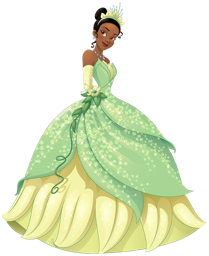

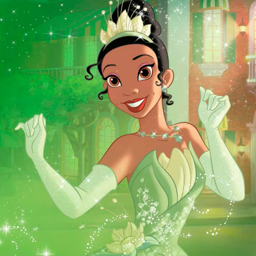

Searching for 'Cinderella Disney Princess'


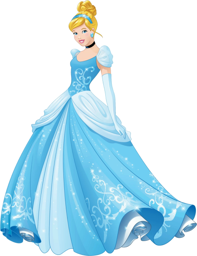

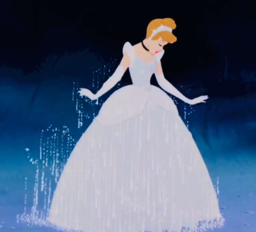

Searching for 'Snow White Disney Princess'


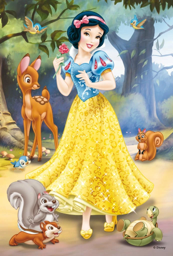

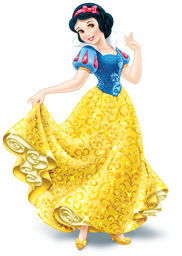

Searching for 'Jasmine Disney Princess'


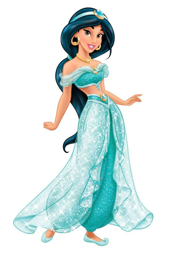

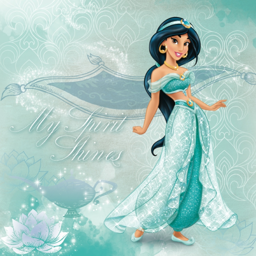

Searching for 'Mulan Disney Princess'


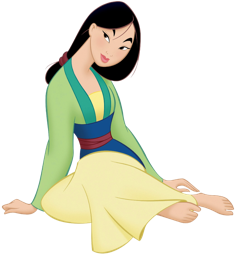

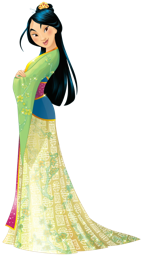

Searching for 'Ariel Disney Princess'


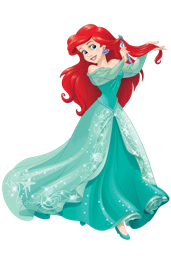

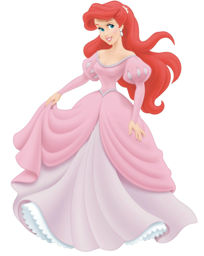

In [41]:
princesses = ['Tiana', 'Cinderella', 'Snow White', 'Jasmine', 'Mulan', 'Ariel']

def search_images(term, max_images=2):
    print(f"Searching for '{term}'")
    with DDGS() as ddgs:
        return [r['image'] for r in ddgs.images(keywords=term, max_results=max_images)]

for princess in princesses:
    try:
        # Search for 2 images of each Disney Princess
        urls = search_images(f'{princess} Disney Princess', max_images=2)

        for idx, url in enumerate(urls):
            if url:
                # Download the image and save with a unique name
                dest = f'{princess.replace(" ", "_")}_{idx+1}.jpg'  # Use the character's name with an index
                download_url(url, dest, show_progress=False)

                # Open and display the image
                im = Image.open(dest)
                display(im.to_thumb(256, 256))
            else:
                print(f"No image found for {princess} at index {idx}.")
    except Exception as e:
        print(f"Failed to retrieve image for {princess}: {e}")

I now uploaded my image of a disney princess which at the end the model will decide if it is a disney princess or not

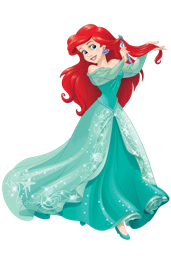

In [42]:
from fastdownload import download_url
dest = 'Ariel.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Next, I will find images of marvel avengers to compare against disney princess.

Searching for 'Iron Man Marvel Avengers'


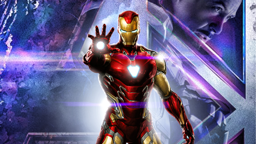

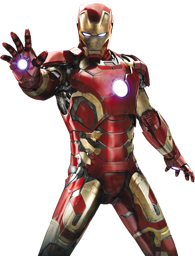

Searching for 'Captain America Marvel Avengers'


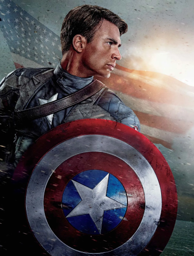

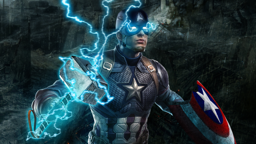

Searching for 'Thor Marvel Avengers'


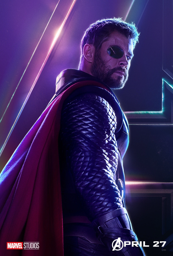

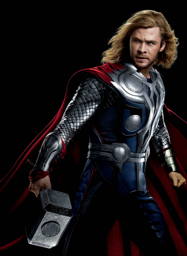

Searching for 'Hulk Marvel Avengers'


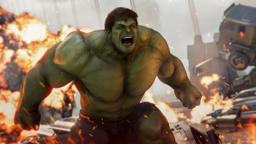

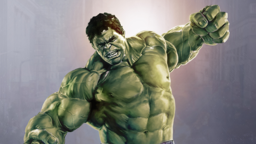

Searching for 'Black Widow Marvel Avengers'


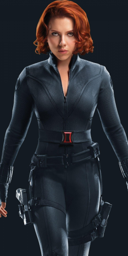

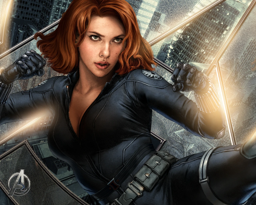

Searching for 'Black Panther Marvel Avengers'


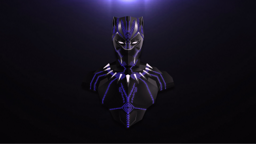

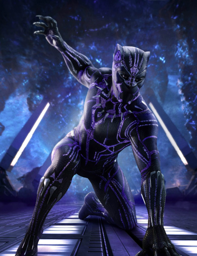

In [43]:
# List of Avengers characters
avengers = ['Iron Man', 'Captain America', 'Thor', 'Hulk', 'Black Widow', 'Black Panther']

for avenger in avengers:
    try:
        # Search for 2 images of each Avenger
        urls = search_images(f'{avenger} Marvel Avengers', max_images=2)

        for idx, url in enumerate(urls):
            if url:
                # Download the image and save with a unique name
                dest = f'{avenger.replace(" ", "_")}_{idx+1}.jpg'  # Use the character's name with an index
                download_url(url, dest, show_progress=False)

                # Open and display the image
                im = Image.open(dest)
                display(im.to_thumb(256, 256))
            else:
                print(f"No image found for {avenger} at index {idx}.")
    except Exception as e:
        print(f"Failed to retrieve image for {avenger}: {e}")

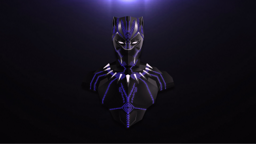

In [44]:
from fastdownload import download_url
dest = 'marvelAvenger.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Now, label the images as either disney princess or marvel avenger

In [45]:
# Lists of characters
disney_princesses = ['Tiana', 'Cinderella', 'Snow White', 'Jasmine', 'Mulan', 'Ariel']
marvel_avengers = ['Iron Man', 'Captain America', 'Thor', 'Hulk', 'Black Widow', 'Black Panther']

# Define search categories
search_categories = {'Disney Princess': disney_princesses, 'Marvel Avenger': marvel_avengers}

# Set up the path
path = Path('disneyPrincess_or_not')
path.mkdir(exist_ok=True, parents=True)

from time import sleep

for category, characters in search_categories.items():
    for character in characters:
        try:
            dest = path / category / character.replace(" ", "_")
            dest.mkdir(exist_ok=True, parents=True)

            # Search and download images
            urls = search_images(f'{character} {category}', max_images=1)
            if urls:
                download_url(urls[0], dest / f'{character.replace(" ", "_")}.jpg', show_progress=False)
                sleep(10)  # Pause between searches to avoid over-loading server

                # Resize images
                resize_images(dest, max_size=400, dest=dest)
            else:
                print(f"No images found for {character}.")
        except Exception as e:
            print(f"Failed to retrieve image for {character}: {e}")

Searching for 'Tiana Disney Princess'
Searching for 'Cinderella Disney Princess'
Searching for 'Snow White Disney Princess'
Searching for 'Jasmine Disney Princess'
Searching for 'Mulan Disney Princess'
Searching for 'Ariel Disney Princess'
Searching for 'Iron Man Marvel Avenger'
Searching for 'Captain America Marvel Avenger'
Searching for 'Thor Marvel Avenger'
Searching for 'Hulk Marvel Avenger'
Searching for 'Black Widow Marvel Avenger'
Searching for 'Black Panther Marvel Avenger'


## Step 2: Train our model

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [47]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

Updating image paths because they all went to the same place.Also deleting any duplicates that may have arose.

In [48]:
from pathlib import Path
import shutil

# Define paths for the categories
disney_path = Path('/kaggle/working/disney_princesses')
avengers_path = Path('/kaggle/working/marvel_avengers')

# Create directories if they don't exist
disney_path.mkdir(parents=True, exist_ok=True)
avengers_path.mkdir(parents=True, exist_ok=True)

# Define the base names for the images
disney_princesses_base = ['Tiana', 'Cinderella', 'Snow_White', 'Jasmine', 'Mulan', 'Ariel']
avengers_base = ['Captain_America', 'Black_Panther', 'Black_Widow', 'Iron_Man', 'Hulk', 'Thor']

# Move Disney Princess images
for princess in disney_princesses_base:
    for idx in range(1, 3):  # Assuming you have 2 images per character
        src = Path(f'/kaggle/working/{princess}_{idx}.jpg')
        dest = disney_path / src.name
        if src.exists():
            shutil.move(str(src), str(dest))

# Move Avengers images
for avenger in avengers_base:
    for idx in range(1, 3):  # Assuming you have 2 images per character
        src = Path(f'/kaggle/working/{avenger}_{idx}.jpg')
        dest = avengers_path / src.name
        if src.exists():
            shutil.move(str(src), str(dest))

# Clean up any files in the root working directory
root_path = Path('/kaggle/working')
for file in root_path.glob('*.jpg'):
    print(f"Deleting file in wrong location: {file}")
    file.unlink()

# Check Disney Princesses directory for any non-Disney images
for file in disney_path.glob('*.jpg'):
    if not any(base in file.name for base in disney_princesses_base):
        print(f"Deleting file in wrong Disney location: {file}")
        file.unlink()

# Finally, check Avengers directory for any non-Avenger images
for file in avengers_path.glob('*.jpg'):
    if not any(base in file.name for base in avengers_base):
        print(f"Deleting file in wrong Avenger location: {file}")
        file.unlink()



Deleting file in wrong location: /kaggle/working/Ariel.jpg
Deleting file in wrong location: /kaggle/working/marvelAvenger.jpg


For my labeling I had a lot of issues because I didn't have enough images. So, I ended up pulling multiple images of each type of disney princess to deal with this issue.

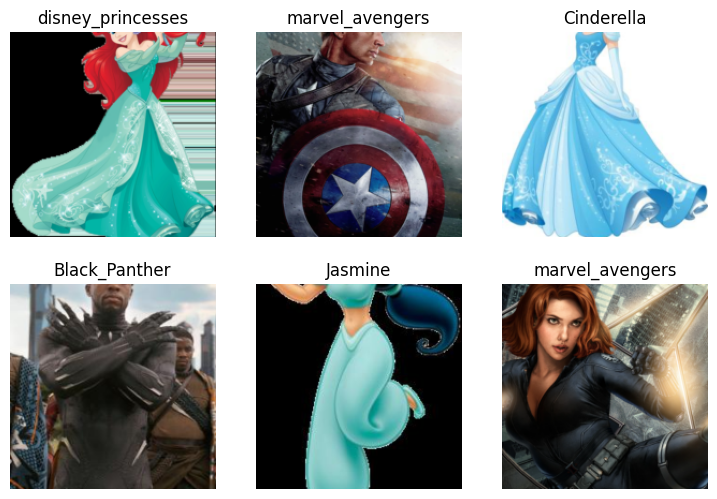

In [67]:
from pathlib import Path  # Ensure this import is included
from sklearn.model_selection import train_test_split 
import random

def custom_splitter(items, valid_pct=0.2, seed=None):
    "A splitter that ensures each label is represented in both the training and validation sets, even with small datasets."
    if seed is not None:
        random.seed(seed)
    
    labels = [parent_label(item) for item in items]
    label_to_indices = defaultdict(list)
    
    # Group indices by label
    for i, label in enumerate(labels):
        label_to_indices[label].append(i)
    
    train_idx = []
    valid_idx = []
    
    for label, indices in label_to_indices.items():
        if len(indices) == 1:
            # If only one sample for this label, put it in the training set
            train_idx.extend(indices)
        else:
            # Shuffle and split the indices into train and validation
            random.shuffle(indices)
            split = int(len(indices) * (1 - valid_pct))
            train_idx.extend(indices[:split])
            valid_idx.extend(indices[split:])
    
    return train_idx, valid_idx

# Path to the image files
path = Path('/kaggle/working')

# Create a DataBlock using the custom splitter
train_idx, valid_idx = custom_splitter(get_image_files(path), valid_pct=0.2, seed=42)
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files, 
    splitter=IndexSplitter(valid_idx),
    get_y=parent_label,
    item_tfms=Resize(192)
).dataloaders(path, bs=6)

dls.show_batch(max_n=6)

The model has a somewhat high error rate with it being at 37% I think I needed to make my training data less confusing with having specific names along with group names.

In [65]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,4.395314,4.347292,0.875000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,3.332618,3.178467,0.875000,00:02
1,3.333899,1.610414,0.500000,00:02
2,2.742722,1.287069,0.375000,00:02
3,2.526842,1.454548,0.375000,00:02
4,2.216819,1.538967,0.375000,00:02


## Step 3: Use our model (and build your own!)

I then ran different matrix's to understand how well the model was performing on a deeper level.

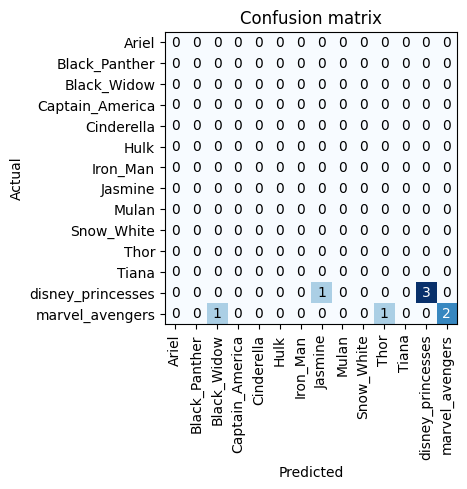

In [69]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

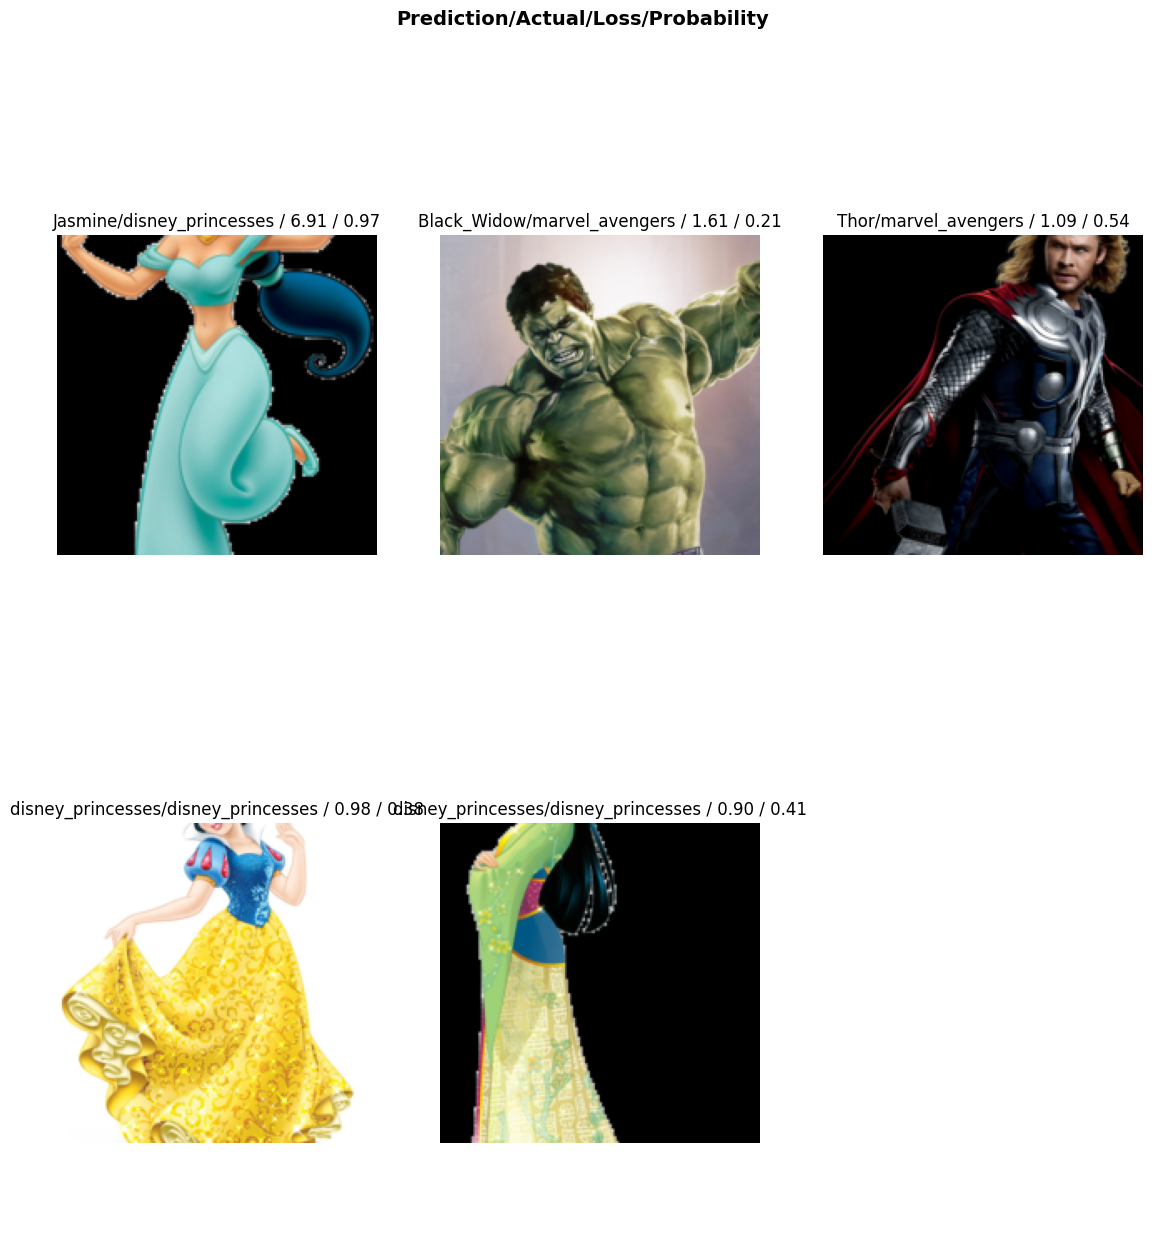

In [72]:
interp.plot_top_losses(5, figsize=(14,14))

Finally I worked on deploying my model.

In [86]:
learn.export('model.pkl')

In [92]:
from fastai.vision.all import *
import gradio as gr

# load the model trained above
learn = load_learner('model.pkl')

# get the classes/labels from the above
labels = learn.dls.vocab

# define predictImage so that it:
def predictImage(img):
  # converts the image to fastai's PILImage
    img = PILImage.create(img)
    # get te prediction
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

# gradioInterface so that i can launch easily later
gradioInterface = gr.Interface(
    fn=predictImage,
    inputs=gr.Image(),
    outputs=gr.Label(num_top_classes=3),
    title="Disney Classifier"
)

gradioInterface.launch(
    share=True
)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://362c117e2ed3bb3d05.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
